<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Matplotlib](05.01-Matplotlib.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz](05.03-Quiz.ipynb) ></span>

<a href="https://colab.research.google.com/github/eurostat/e-learning/blob/main/python-official-statistics/05.02-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a id='top'></a>

# Evolutions: Seaborn, Plotly and Bokeh
## Content  
- [Seaborn](#seaborn)
- [Plotly](#plotly)
- [Bokeh](#bokeh)

Matplotlib has proven its usefulness and it is stil a very popular visualisation tool, but it is starting to show its age. One of the complaints is that because of its low level API, for sophisticated statistical visualization, is often needed a lot of code. Another complaint is not being designed to use Pandas DataFrame (Matplotlib predate Pandas with some 10 years). To be fair, Matplotlib is still evolving and it's trying to address some of the problems.  

<a id='seaborn'></a>

## Seaborn
An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers a lot of configurability and many styles, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``.
### Seaborn Versus Matplotlib
Seaborn can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

In [4]:
# initializations
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# data creation
rng = np.random.RandomState(420)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 4), 0)

#### Matplotlib alone

In [ ]:
plt.plot(x, y)
plt.legend('ABCD', ncol=2, loc='upper left')

#### Matplotlib with a little help from a friend (Seaborn)  

We can set the style by calling Seaborn's ``set()`` method.  

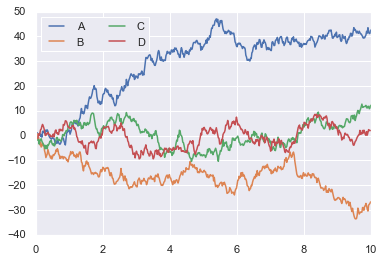

In [5]:
import seaborn as sns
sns.set()

# same code, but a better result!
plt.plot(x, y)
plt.legend('ABCD', ncol=2, loc='upper left')

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables:

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

sns.histplot(data, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a ``kernel density estimation``, which Seaborn does with ``sns.kdeplot``:

In [ ]:
sns.kdeplot(data['x'], shade=True, color='blue')
sns.kdeplot(data['y'], shade=True, color='orange')

Or having Histograms and KDE combined using ``distplot``:

In [ ]:
sns.histplot(data, kde=True)

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

In [ ]:
sns.kdeplot(data=data, x='x', y='y', color='blue', fill=True)

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

In [ ]:
sns.jointplot(data=data, x='x', y='y', kind='kde', fill=True)

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

In [ ]:
sns.jointplot(data=data, x='x', y='y', kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [6]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

In [ ]:
sns.pairplot(iris, hue='species', height=2.5)

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

<a id='plotly'></a>

## Plotly
Plotly’s Python graphing library makes it easy to create ``interactive``, publication-quality graphs. It can also create similar charts as Matplotlib and seaborn such as line plots, scatter plots, area charts, bar charts, etc.  
### Like R
If you are a fan of plots in R and miss its features when switching to Python, Plotly gives you the same quality plots using Python!

In [ ]:
import plotly.express as px

fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species')
fig.show()

### Complex plots made easy
With Plotly, some plots that are usually challenging to create can be created easily.

In [ ]:
import plotly.express as px
fig = px.histogram(tips, x="total_bill", y="tip", color="sex", marginal="rug", hover_data=tips.columns)
fig.show()

### Interactive
And all of them, all Plotly plots are interactive. This means that after the image is shown you can, from inside Jupyter, to:
- download the plot as image;
- zoom in/out;
- select a section to zoom in.

<a id='bokeh'></a>

## Bokeh
Bokeh is a flexible interactive visualization library that targets web browsers for representation.  
### Interactive version of Matplotlib
If we will rank among the interactive visualization libraries above, Bokeh will probably rank first in regards to the similarity to Matplotlib.  
Matplotlib can create any plot because it is a low-level visualization library. Bokeh can be both used as a high-level or low-level interface; thus, it can create many sophisticated plots that Matplotlib creates but with fewer lines of code and higher resolution.

In [7]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap, factor_mark

output_notebook()

SPECIES = sorted(iris['species'].unique())
MARKERS = ['square', 'circle', 'triangle']

p = figure(title = "Iris species", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Sepal length'
p.yaxis.axis_label = 'Sepal width'

p.scatter(x="sepal_length", y="sepal_width", source=iris,
          legend_group="species", fill_alpha=0.4, size=12,
          marker=factor_mark('species', MARKERS, SPECIES),
          color=factor_cmap('species', 'Category10_3', SPECIES))

p.legend.location = "top_left"
p.legend.title = "Species"

show(p)

Loading BokehJS ...

### Link between Plots
Bokeh also makes it really easy to link between plots. The change applied in one plot will be applied to another plot with a similar variable.

In [8]:
from bokeh.layouts import gridplot
from bokeh.palettes import Category10

y0 = iris[iris['species'] == 'setosa']
y1 = iris[iris['species'] == 'versicolor']
y2 = iris[iris['species'] == 'virginica']

plot_options = dict(width=300, plot_height=300, tools='pan,wheel_zoom')
img_options = dict(fill_alpha=0.4, size=12)
# create a new plot
s1 = figure(**plot_options)
s1.square(x=y0['sepal_length'], y=y0['sepal_width'], color=Category10[3][0], **img_options)

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.circle(x=y1['sepal_length'], y=y1['sepal_width'], color=Category10[3][1], **img_options)

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.triangle(x=y2['sepal_length'], y=y2['sepal_width'], color=Category10[3][2], **img_options)

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

## Resources
This part was just an appetizer for some interesting developments in visualization environment, and what can be done with some of the libraries. For more examples, functionality or other libraries: 
- For a full book about Matplotlib, I will recommend [*Interactive Applications Using Matplotlib*](https://www.packtpub.com/application-development/interactive-applications-using-matplotlib), written by Matplotlib core developer Ben Root.
- [Seaborn](http://seaborn.pydata.org/) is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics..
- [Plotly](http://plot.ly) is the open source product of the Plotly company. Use of the library is entirely free.
- [Bokeh](http://bokeh.pydata.org) is a JavaScript visualization library with a Python frontend that creates highly interactive visualizations.
- [Vispy](http://vispy.org/) is an actively developed project focused on dynamic visualizations of very large datasets.
- [Ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html) is a Python data visualization package with a 3k+ stars rating on Github, based on the ggplot2 implementation for the R programming language.
- [Vega](https://vega.github.io/) and [Vega-Lite](https://vega.github.io/vega-lite) are declarative graphics representations, and are the product of years of research into the fundamental language of data visualization.
- [Altair](https://altair-viz.github.io/) is a Python-based statistical data visualization package. It is based on Vega and Vega-Lite, declarative languages for generating, preserving, and sharing interactive data visualization designs.


<!--NAVIGATION-->
<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>< [Matplotlib](05.01-Matplotlib.ipynb) | [Contents](00.00-Index.ipynb) | [Quiz](05.03-Quiz.ipynb) > [Top](#top) ^ </span>

<span style='background: rgb(128, 128, 128, .15); width: 100%; display: block; padding: 10px 0 10px 10px'>This is the Jupyter notebook version of the __Python for Official Statistics__ produced by Eurostat; the content is available [on GitHub](https://github.com/eurostat/e-learning/tree/main/python-official-statistics).
<br>The text and code are released under the [EUPL-1.2 license](https://github.com/eurostat/e-learning/blob/main/LICENSE).</span>